In [642]:
import pandas as pd
import numpy as np


__Data Cleaning__

In [643]:
# data="D:\RESUME ML PROJECTS\Air Quality Prediction\notebooks\city_day.csv"
data=pd.read_csv(r"D:\RESUME ML PROJECTS\Air Quality Prediction\notebooks\city_day.csv")
print(data)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [644]:
data.shape

(29531, 16)

In [645]:
# check null values
data.isnull().sum(

)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [646]:
# remove null values
data.dropna(inplace=True)

In [647]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [648]:
# check duplicated
data.duplicated().sum()

0

In [649]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


__Convert the Dattime object into time__

__1.extract the year and monthe from datetime__



In [650]:
# convert the dattaime object into datetime
data['Date']=pd.to_datetime(data['Date'])

In [651]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        6236 non-null   object        
 1   Date        6236 non-null   datetime64[ns]
 2   PM2.5       6236 non-null   float64       
 3   PM10        6236 non-null   float64       
 4   NO          6236 non-null   float64       
 5   NO2         6236 non-null   float64       
 6   NOx         6236 non-null   float64       
 7   NH3         6236 non-null   float64       
 8   CO          6236 non-null   float64       
 9   SO2         6236 non-null   float64       
 10  O3          6236 non-null   float64       
 11  Benzene     6236 non-null   float64       
 12  Toluene     6236 non-null   float64       
 13  Xylene      6236 non-null   float64       
 14  AQI         6236 non-null   float64       
 15  AQI_Bucket  6236 non-null   object        
dtypes: datetime64[ns](1), flo

In [652]:
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day

In [653]:
data.head()

City       Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
2123  Amaravati 2017-11-25  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2124  Amaravati 2017-11-26  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
2125  Amaravati 2017-11-27  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
2126  Amaravati 2017-11-28  64.18  104.09  2.56  28.07  17.01  11.42  0.09   
2127  Amaravati 2017-11-29  72.47  114.84  5.23  23.20  16.59  12.25  0.16   

        SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  Month  \
2123  15.24  127.09     0.20     6.50    0.06  184.0   Moderate  2017     11   
2124  26.96  117.44     0.22     7.95    0.08  197.0   Moderate  2017     11   
2125  33.59  111.81     0.29     7.63    0.12  198.0   Moderate  2017     11   
2126  19.00  138.18     0.17     5.02    0.07  188.0   Moderate  2017     11   
2127  10.55  109.74     0.21     4.71    0.08  173.0   Moderate  2017     11   

      Day  
2123   25  
2124   26  
2125   27  
2126   28  
2127   29

In [654]:
# drop the datime col
data=data.drop(columns="Date",axis=1)

In [655]:
data.head()

City  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2  \
2123  Amaravati  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24   
2124  Amaravati  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96   
2125  Amaravati  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59   
2126  Amaravati  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00   
2127  Amaravati  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55   

          O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  Month  Day  
2123  127.09     0.20     6.50    0.06  184.0   Moderate  2017     11   25  
2124  117.44     0.22     7.95    0.08  197.0   Moderate  2017     11   26  
2125  111.81     0.29     7.63    0.12  198.0   Moderate  2017     11   27  
2126  138.18     0.17     5.02    0.07  188.0   Moderate  2017     11   28  
2127  109.74     0.21     4.71    0.08  173.0   Moderate  2017     11   29

In [656]:
data.reset_index(drop=True, inplace=True)


In [657]:
data.head()

City  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  \
0  Amaravati  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09   
1  Amaravati  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44   
2  Amaravati  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81   
3  Amaravati  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18   
4  Amaravati  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74   

   Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  Month  Day  
0     0.20     6.50    0.06  184.0   Moderate  2017     11   25  
1     0.22     7.95    0.08  197.0   Moderate  2017     11   26  
2     0.29     7.63    0.12  198.0   Moderate  2017     11   27  
3     0.17     5.02    0.07  188.0   Moderate  2017     11   28  
4     0.21     4.71    0.08  173.0   Moderate  2017     11   29

__Seperate the categorical cols and numerical cols__

In [658]:
categorical_cols=data.select_dtypes(include="object").columns
numerical_cols=data.select_dtypes(exclude='object').columns

In [659]:
print(f"categorical cols are {categorical_cols}")
print(f'numerical cols are {numerical_cols}')

categorical cols are Index(['City', 'AQI_Bucket'], dtype='object')
numerical cols are Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'Year', 'Month', 'Day'],
      dtype='object')


__Check the unique values of each categorical col__

In [660]:
for col in categorical_cols:
    print(col)
    unique_col=data[col].unique()
    print(f'unique values of  {col} is {unique_col}')

City
unique values of  City is ['Amaravati' 'Amritsar' 'Chandigarh' 'Delhi' 'Gurugram' 'Hyderabad'
 'Kolkata' 'Patna' 'Visakhapatnam']
AQI_Bucket
unique values of  AQI_Bucket is ['Moderate' 'Poor' 'Very Poor' 'Satisfactory' 'Good' 'Severe']


__Describe of the data__

In [661]:
data.describe()

PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     61.327365   123.418321    17.015191    31.708190    32.448956   
std      53.709682    85.791491    20.037836    18.784041    27.388129   
min       2.000000     7.800000     0.250000     0.170000     0.170000   
25%      27.927500    66.970000     5.080000    15.977500    14.547500   
50%      47.490000   103.010000    10.060000    28.900000    24.285000   
75%      73.442500   150.770000    19.392500    43.632500    39.622500   
max     639.190000   796.880000   159.220000   140.170000   224.090000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     20.737070     0.984344    11.514426    36.127691     3.700361   
std      16.088215     1.356161     7.166113    19.553695     5.062159   
min       0.120000     0.000000     0.710000     1.550000     0.000000   
25%      10.390000     0.490000     6.557500    22.357500     0.910000   
50%      14.690000     0.730000     9.875000    32.540000     2.435000   
75%      28.545000     1.060000    14.430000    45.512500     4.620000   
max     166.700000    16.230000    70.390000   162.330000    64.440000   

           Toluene       Xylene          AQI         Year        Month  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean     10.323696     2.557439   140.510103  2018.384381     6.213278   
std      12.287223     4.535060    92.738826     1.395700     3.594889   
min       0.000000     0.000000    23.000000  2015.000000     1.000000   
25%       2.210000     0.300000    78.000000  2018.000000     3.000000   
50%       6.310000     1.250000   112.000000  2019.000000     6.000000   
75%      13.040000     3.030000   166.000000  2019.000000    10.000000   
max     103.000000   125.180000   677.000000  2020.000000    12.000000   

               Day  
count  6236.000000  
mean     15.726427  
std       8.823688  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      23.000000  
max      31.000000

__Data Visualization__

In [662]:
import seaborn as sns
import matplotlib.pyplot as plt

In [663]:
data.head(2)

City  PM2.5    PM10    NO   NO2    NOx    NH3    CO    SO2      O3  \
0  Amaravati  81.40  124.50  1.44  20.5  12.08  10.72  0.12  15.24  127.09   
1  Amaravati  78.32  129.06  1.26  26.0  14.85  10.28  0.14  26.96  117.44   

   Benzene  Toluene  Xylene    AQI AQI_Bucket  Year  Month  Day  
0     0.20     6.50    0.06  184.0   Moderate  2017     11   25  
1     0.22     7.95    0.08  197.0   Moderate  2017     11   26

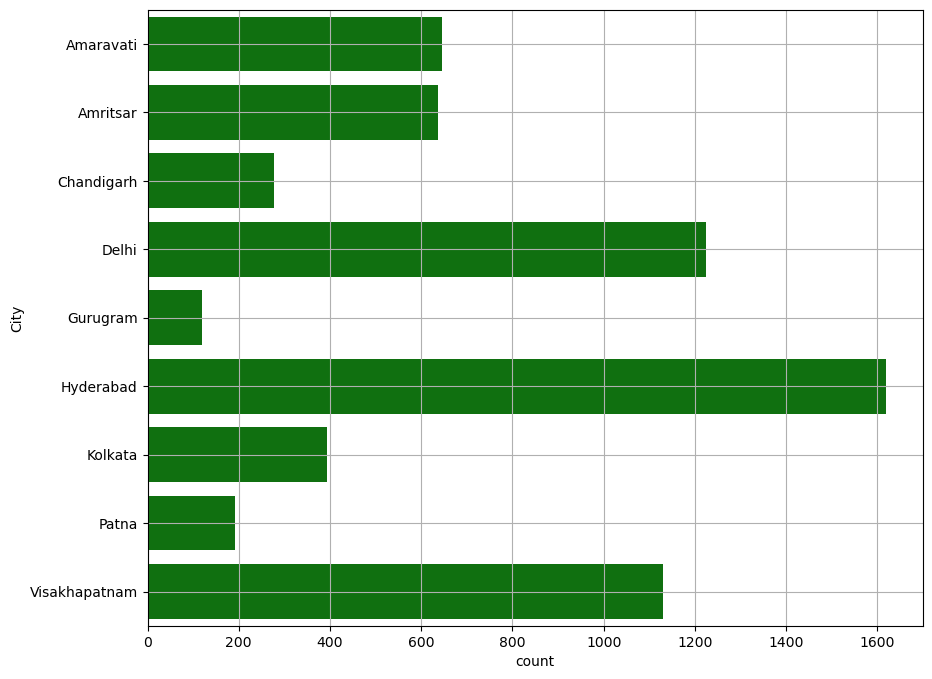

In [664]:
# check the city values
plt.figure(figsize=(10,8))
sns.countplot(data['City'],color='green')
plt.grid()
plt.show()

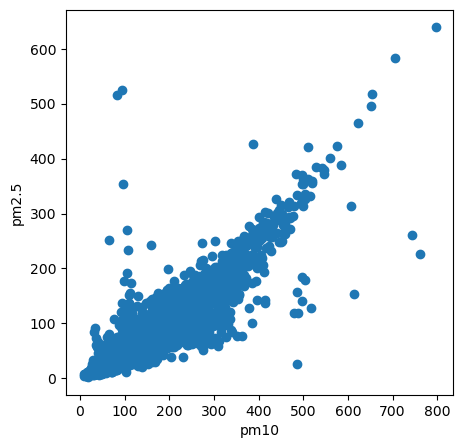

In [665]:
plt.figure(figsize=(5,5))
plt.xlabel("pm10")
plt.ylabel("pm2.5")
plt.scatter(x="PM10",y="PM2.5",data=data)
plt.show()

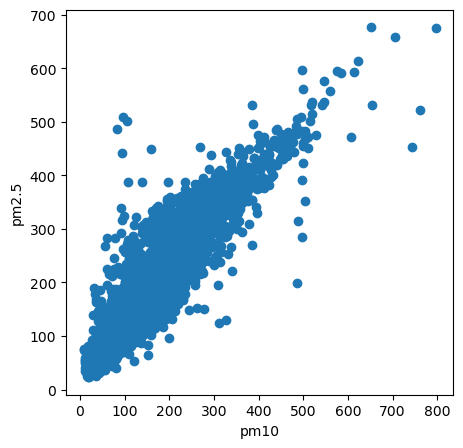

In [666]:
# check the relation with target variabel
plt.figure(figsize=(5,5))
plt.xlabel("pm10")
plt.ylabel("pm2.5")
plt.scatter(x="PM10",y="AQI",data=data)
plt.show()

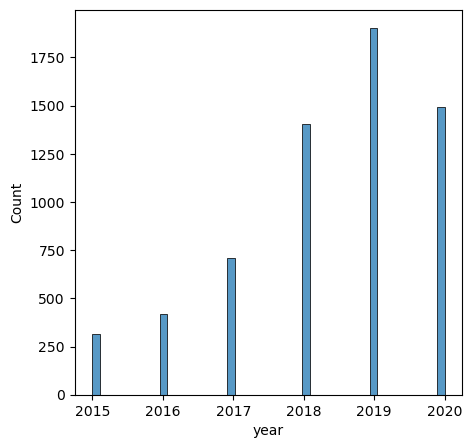

In [667]:
plt.figure(figsize=(5,5))
plt.xlabel("year")
sns.histplot(data['Year'])
plt.show()

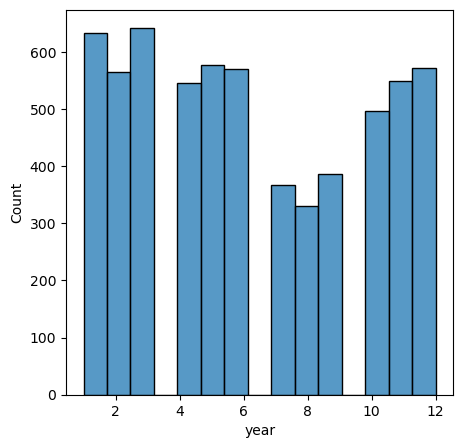

In [668]:
plt.figure(figsize=(5,5))
plt.xlabel("year")
sns.histplot(data['Month'])
plt.show()

__Convert the categorical into numerical__

In [669]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['City']=label_encoder.fit_transform(data['City'])
data['AQI_Bucket']=label_encoder.fit_transform(data['AQI_Bucket'])

In [670]:
data.head()

City  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3  \
0     0  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09   
1     0  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44   
2     0  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81   
3     0  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18   
4     0  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55  109.74   

   Benzene  Toluene  Xylene    AQI  AQI_Bucket  Year  Month  Day  
0     0.20     6.50    0.06  184.0           1  2017     11   25  
1     0.22     7.95    0.08  197.0           1  2017     11   26  
2     0.29     7.63    0.12  198.0           1  2017     11   27  
3     0.17     5.02    0.07  188.0           1  2017     11   28  
4     0.21     4.71    0.08  173.0           1  2017     11   29

In [671]:
data['AQI_Bucket'].value_counts()

AQI_Bucket
1    2521
3    2079
2     648
0     454
5     410
4     124
Name: count, dtype: int64

In [672]:
print('aqi')
data['AQI']

aqi


0       184.0
1       197.0
2       198.0
3       188.0
4       173.0
        ...  
6231     47.0
6232     41.0
6233     70.0
6234     68.0
6235     54.0
Name: AQI, Length: 6236, dtype: float64

In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   int32  
 1   PM2.5       6236 non-null   float64
 2   PM10        6236 non-null   float64
 3   NO          6236 non-null   float64
 4   NO2         6236 non-null   float64
 5   NOx         6236 non-null   float64
 6   NH3         6236 non-null   float64
 7   CO          6236 non-null   float64
 8   SO2         6236 non-null   float64
 9   O3          6236 non-null   float64
 10  Benzene     6236 non-null   float64
 11  Toluene     6236 non-null   float64
 12  Xylene      6236 non-null   float64
 13  AQI         6236 non-null   float64
 14  AQI_Bucket  6236 non-null   int32  
 15  Year        6236 non-null   int32  
 16  Month       6236 non-null   int32  
 17  Day         6236 non-null   int32  
dtypes: float64(13), int32(5)
memory usage: 755.3 KB


__Outlier Removal__

In [674]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)

iqr=q3-q1


lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr



cleaned_data = data[~((data < lower_fence) | (data > upper_fence))]
print(cleaned_data)

      City  PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2     O3  \
0        0  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24    NaN   
1        0  78.32  129.06  1.26  26.00  14.85  10.28  0.14    NaN    NaN   
2        0  88.76  135.32  6.60  30.85  21.77  12.91  0.11    NaN    NaN   
3        0  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00    NaN   
4        0  72.47  114.84  5.23  23.20  16.59  12.25  0.16  10.55    NaN   
...    ...    ...     ...   ...    ...    ...    ...   ...    ...    ...   
6231     8   7.63   32.27  5.91  23.27  17.19  11.15  0.46   6.87  19.90   
6232     8  15.02   50.94  7.68  25.06  19.54  12.47  0.47   8.55  23.30   
6233     8  24.38   74.09  3.42  26.06  16.53  11.99  0.52  12.72  30.14   
6234     8  22.91   65.73  3.45  29.53  18.33  10.71  0.48   8.42  30.96   
6235     8  16.64   49.97  4.05  29.26  18.80  10.03  0.52   9.84  28.30   

      Benzene  Toluene  Xylene    AQI  AQI_Bucket    Year  Month  Day  
0        0.20  

<Axes: >

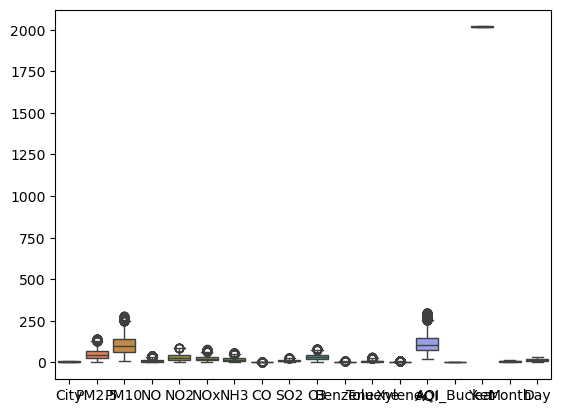

In [675]:
sns.boxplot(cleaned_data)

__Seperate the independent and dependent features__

In [676]:
X=cleaned_data.drop(columns="AQI")
Y=cleaned_data['AQI']

In [677]:
print(f'Independent features are {X.head(2)}')
print(f'Depedent features aare {Y}')

Independent features are    City  PM2.5    PM10    NO   NO2    NOx    NH3    CO    SO2  O3  Benzene  \
0     0  81.40  124.50  1.44  20.5  12.08  10.72  0.12  15.24 NaN     0.20   
1     0  78.32  129.06  1.26  26.0  14.85  10.28  0.14    NaN NaN     0.22   

   Toluene  Xylene  AQI_Bucket    Year  Month  Day  
0     6.50    0.06           1  2017.0     11   25  
1     7.95    0.08           1  2017.0     11   26  
Depedent features aare 0       184.0
1       197.0
2       198.0
3       188.0
4       173.0
        ...  
6231     47.0
6232     41.0
6233     70.0
6234     68.0
6235     54.0
Name: AQI, Length: 6236, dtype: float64


__Train Test SPlit__

In [678]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [679]:
print(f'shape of x is {X.shape} and x_train shape is {x_train.shape} and x_test shape is {x_test.shape}')

shape of x is (6236, 17) and x_train shape is (4988, 17) and x_test shape is (1248, 17)


In [680]:
print(Y.shape,y_train.shape,y_test.shape)

(6236,) (4988,) (1248,)


__Standardised the data__

__Correlation__

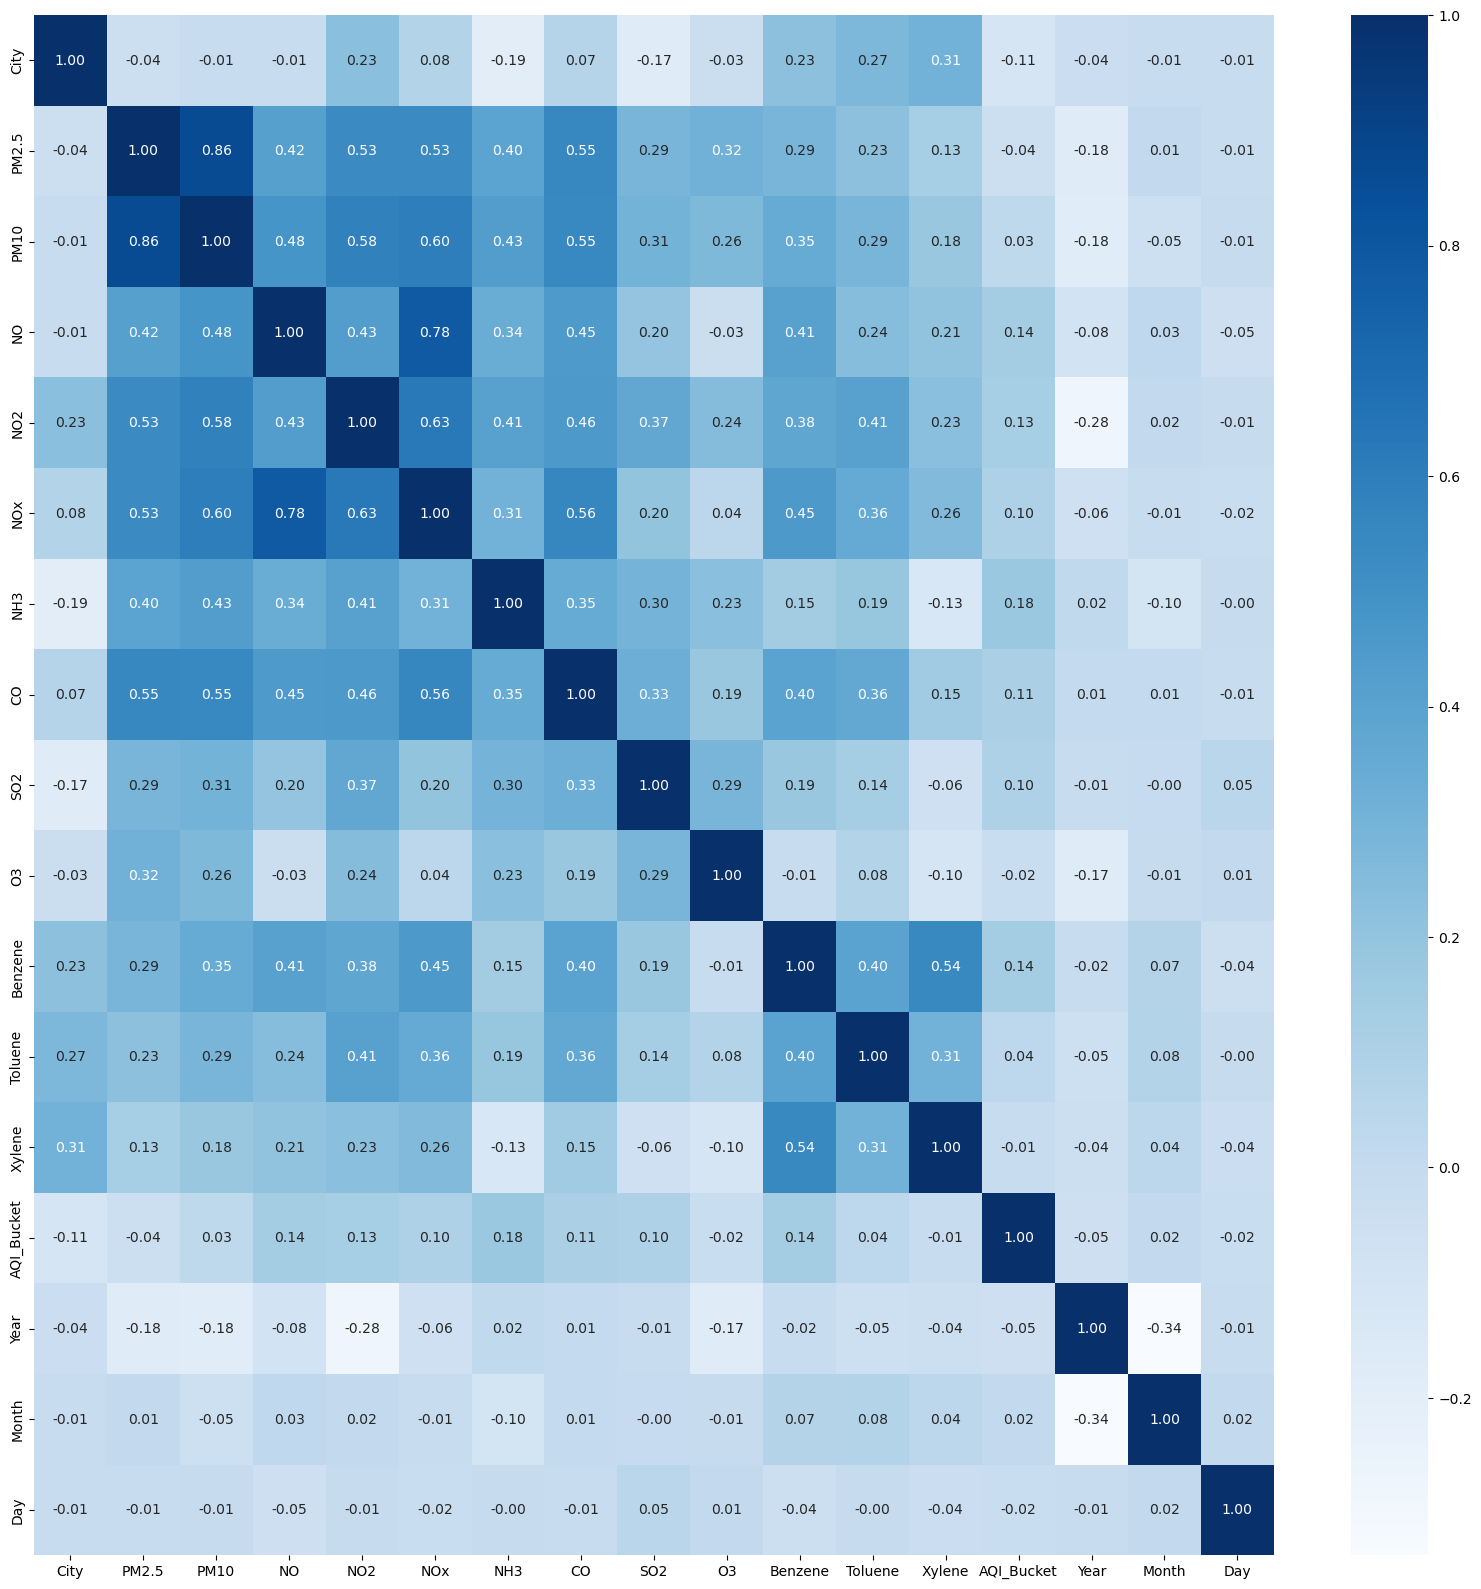

In [681]:
import seaborn as sns
plt.figure(figsize=(20,20))

heatmap=sns.heatmap(x_train.corr(),annot=True,cmap='Blues',fmt='.2f')




plt.show()

__Feature Importance__

In [682]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   int32  
 1   PM2.5       6236 non-null   float64
 2   PM10        6236 non-null   float64
 3   NO          6236 non-null   float64
 4   NO2         6236 non-null   float64
 5   NOx         6236 non-null   float64
 6   NH3         6236 non-null   float64
 7   CO          6236 non-null   float64
 8   SO2         6236 non-null   float64
 9   O3          6236 non-null   float64
 10  Benzene     6236 non-null   float64
 11  Toluene     6236 non-null   float64
 12  Xylene      6236 non-null   float64
 13  AQI         6236 non-null   float64
 14  AQI_Bucket  6236 non-null   int32  
 15  Year        6236 non-null   int32  
 16  Month       6236 non-null   int32  
 17  Day         6236 non-null   int32  
dtypes: float64(13), int32(5)
memory usage: 755.3 KB


In [683]:
def correlation(data,threshold):
    col_name=set()
    col_corr=data.corr()
    for i in range(len(list(col_corr.columns))):
        for j in range(i):
            if (col_corr.iloc[i,j])>threshold:
                col=col_corr.columns[i]
                col_name.add(col)
    return col_name


In [720]:
corr=correlation(data,0.8)
print(corr)

{'AQI', 'PM10', 'NOx'}


__Drop that highly correlated features__

In [685]:
x_train=x_train.drop(columns=['PM10'],axis=1)


In [686]:
x_train.head()

City  PM2.5     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
1025     1  33.95  18.80  17.21  28.34  10.34  0.47  12.85  24.20     1.92   
3346     5  48.68   9.41  32.91  10.06  14.76  0.14   9.66  48.79     0.05   
5098     7  27.71  16.14  26.48  28.90   2.76  0.95   2.98  14.75     1.95   
4329     5  62.38   8.67  34.51  24.29  14.80  0.63   5.24  32.49     0.64   
4404     5  33.94   9.05  22.05  17.67  16.43  0.46   4.69  23.97     1.65   

      Toluene  Xylene  AQI_Bucket    Year  Month  Day  
1025     1.08    1.96           3  2019.0      9   16  
3346     0.77    0.24           1  2017.0      4    7  
5098     4.68    1.18           3  2020.0      6   25  
4329     3.59    0.07           1  2019.0     12   24  
4404     6.78    0.75           3  2020.0      3    8

In [687]:
x_train.shape

(4988, 16)

In [688]:
y_train.shape

(4988,)

In [689]:
x_test.shape

(1248, 17)

In [690]:
y_test.shape

(1248,)

In [691]:
x_test=x_test.drop(columns=['PM10'],axis=1)

In [692]:
x_test.shape

(1248, 16)

In [693]:
x_test.head()

City   PM2.5     NO    NO2    NOx    NH3    CO    SO2     O3  Benzene  \
599      0   23.67   1.58   4.99   3.94   7.93  0.66  18.80  29.32     0.15   
1844     3  120.91  23.19  51.02  68.08  45.92  1.65  20.88  43.68     2.94   
3107     5   40.10   8.83  32.79  28.28  33.59  0.48   6.71  31.34     0.44   
401      0   11.30   4.61  23.47  16.32   1.62  0.28  17.09  27.47     0.11   
4449     5   25.12   7.57  26.18  18.57  17.45  0.39   4.56  23.58     0.94   

      Toluene  Xylene  AQI_Bucket    Year  Month  Day  
599      0.66    0.16           1  2020.0      3   26  
1844     8.36    0.12           5  2017.0     12    6  
3107     3.01    0.37           3     NaN      4   29  
401      0.82    0.15           0  2019.0      7    9  
4449     5.18    0.22           0  2020.0      4   22

__Standardised the data__

In [717]:
x_train.shape

(3033, 16)

In [718]:
x_test.shape

(805, 16)

In [719]:
y_train.shape

(4548,)

In [694]:
x_train.isnull().sum()

City            0
PM2.5         357
NO            505
NO2            42
NOx           368
NH3           169
CO            289
SO2           216
O3            160
Benzene       276
Toluene       409
Xylene        433
AQI_Bucket      0
Year          586
Month           0
Day             0
dtype: int64

In [695]:
x_train.dropna(inplace=True)

In [696]:
x_train.isnull().sum()

City          0
PM2.5         0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64

In [697]:
x_test.isnull().sum()

City            0
PM2.5          89
NO            118
NO2            13
NOx            90
NH3            36
CO             73
SO2            47
O3             38
Benzene        63
Toluene        98
Xylene         93
AQI_Bucket      0
Year          146
Month           0
Day             0
dtype: int64

In [698]:
x_test.dropna(inplace=True)

In [699]:
x_test.isnull().sum()

City          0
PM2.5         0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI_Bucket    0
Year          0
Month         0
Day           0
dtype: int64

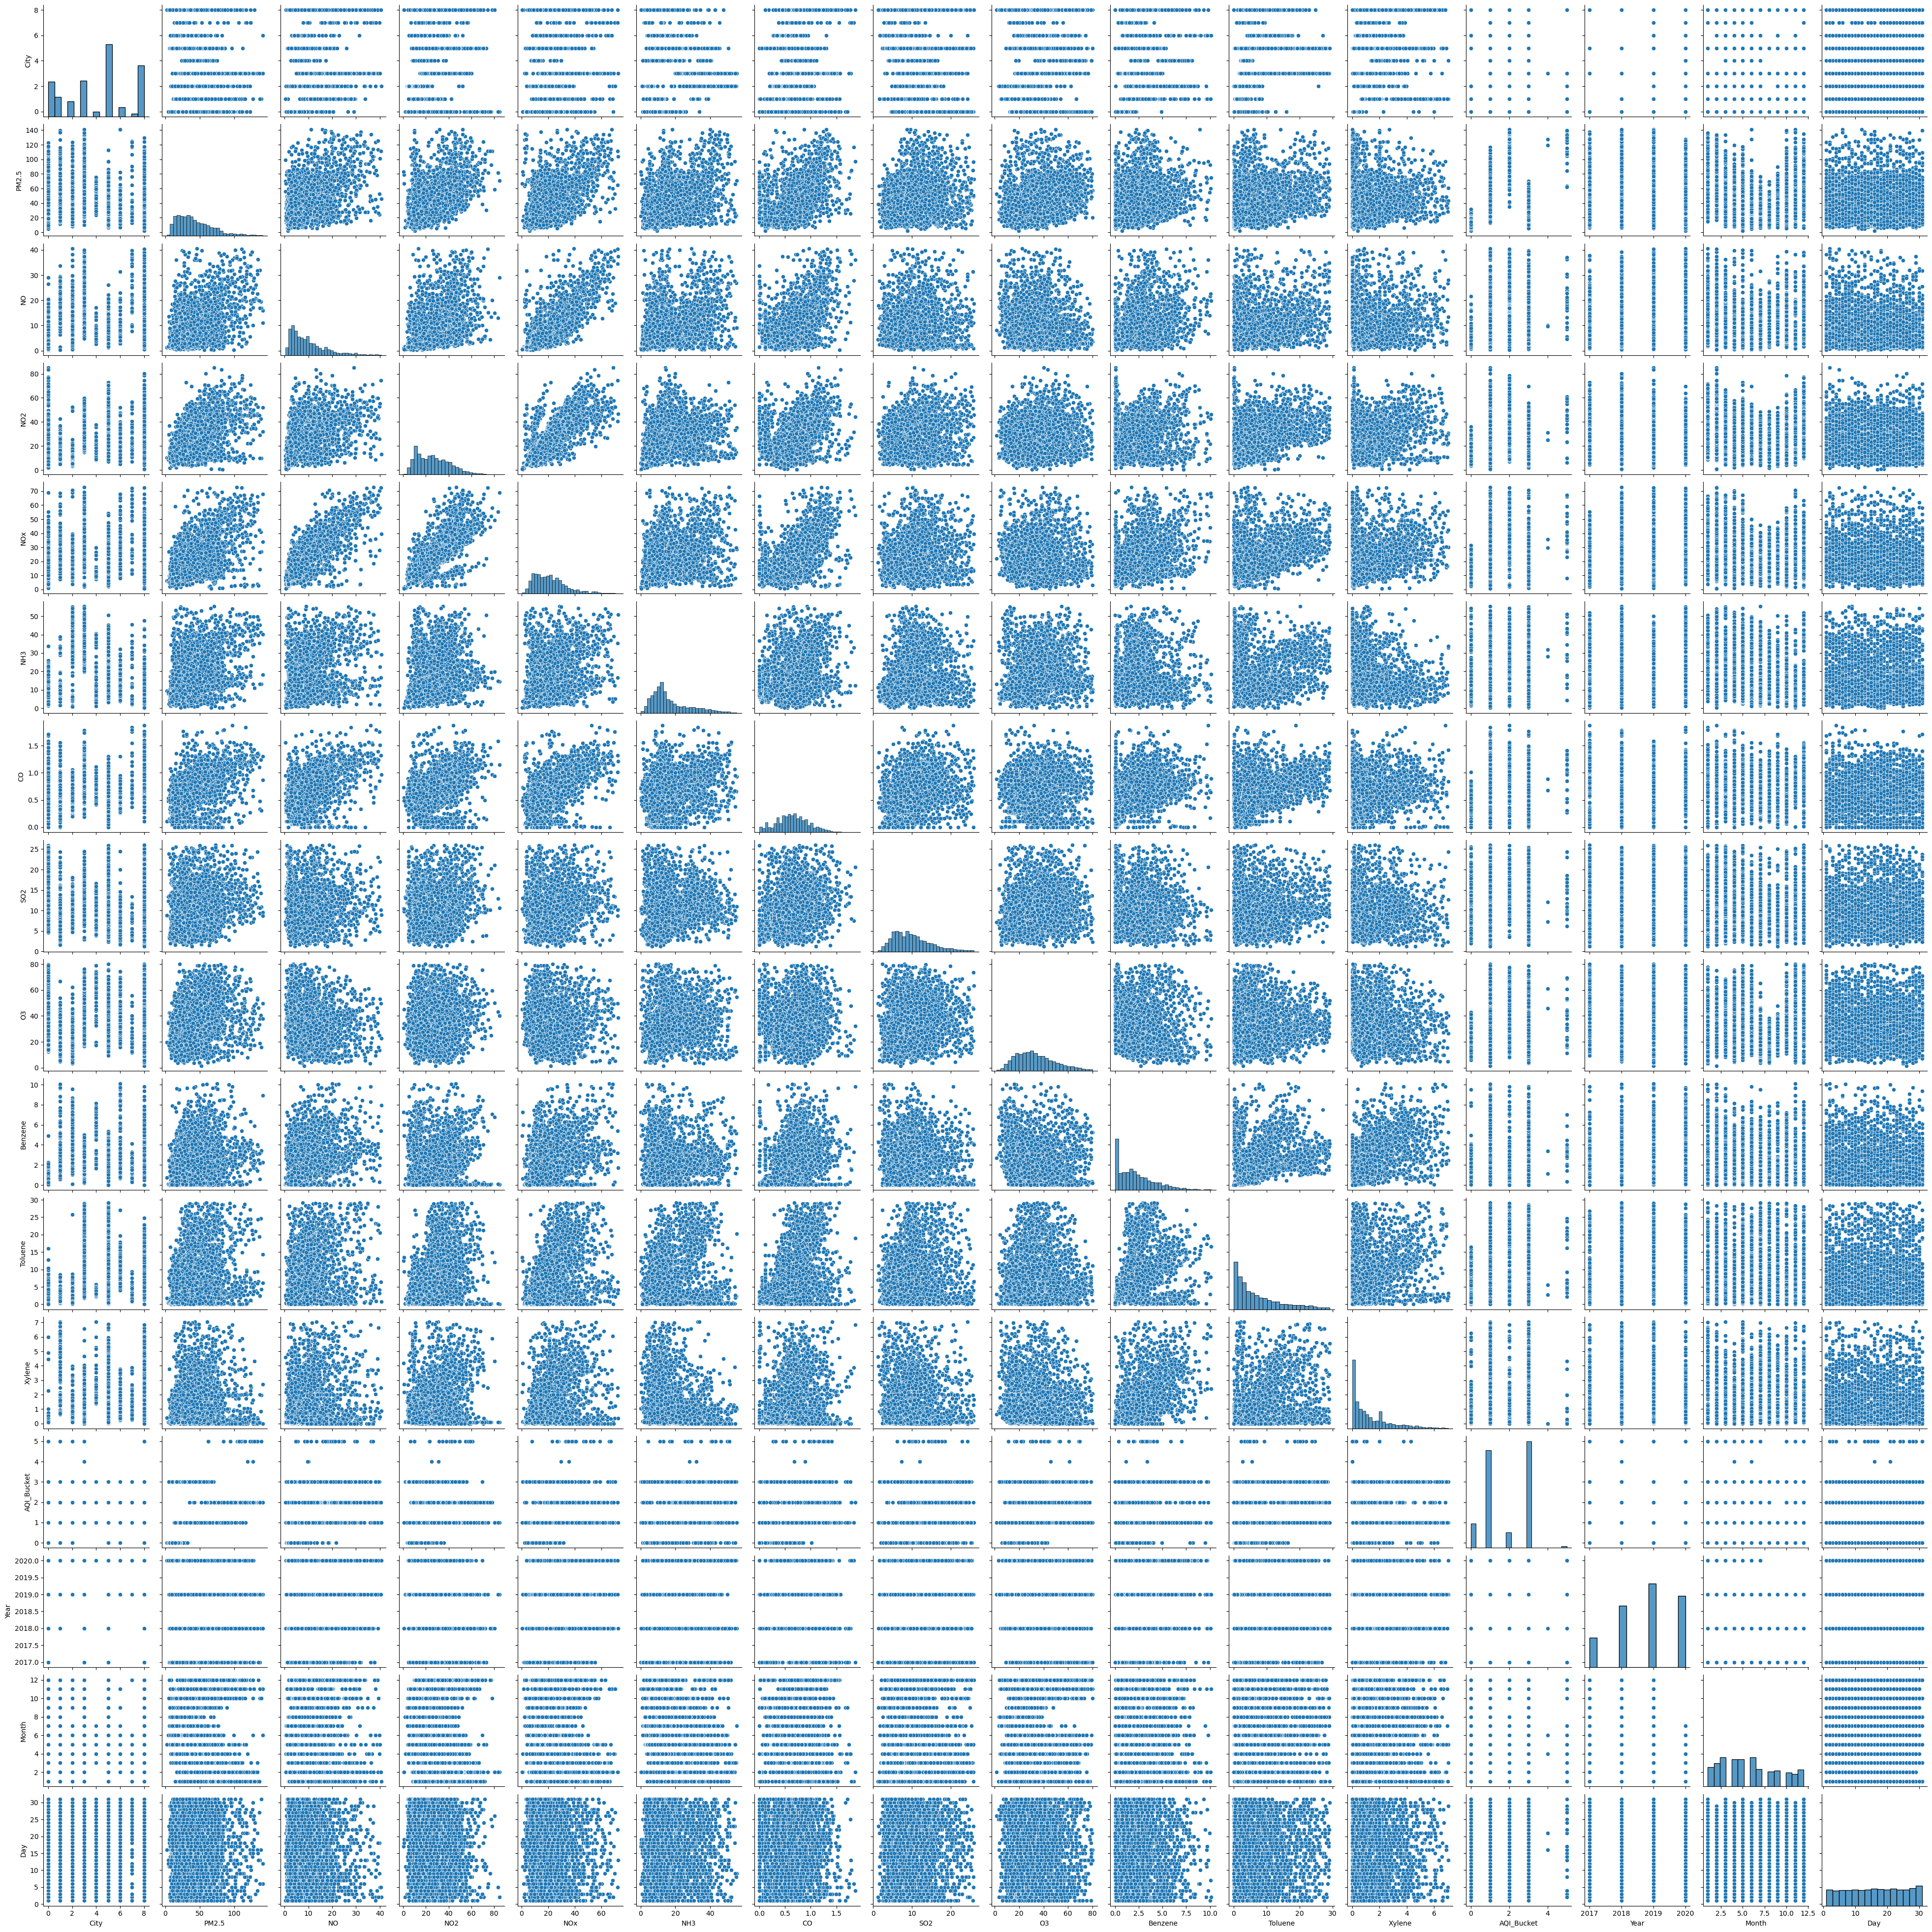

In [700]:
sns.pairplot(x_train)

In [701]:
print(X.shape,x_train.shape,x_test.shape)

(6236, 17) (3033, 16) (805, 16)


In [702]:
print(Y.shape,y_train.shape,y_test.shape)

(6236,) (4988,) (1248,)


In [703]:
y_train.isnull().sum()

440

In [704]:
y_train.dropna(inplace=True)

In [705]:
y_train.isnull().sum()

0

In [706]:
y_test.isnull().sum()

103

In [707]:
y_test.dropna(inplace=True)

In [708]:
y_test.isnull().sum()

0

<Axes: >

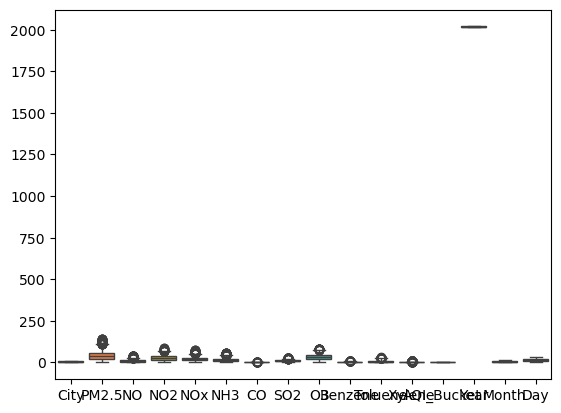

In [709]:
sns.boxplot(x_train)

In [710]:
print(X.shape,x_train.shape,x_test.shape)

(6236, 17) (3033, 16) (805, 16)


In [711]:
print(Y.shape,y_train.shape,y_test.shape)

(6236,) (4548,) (1145,)


__Standarised the data__

In [712]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


__Build the Model__

In [713]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [714]:
models={
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()

}

In [715]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def evalue_model(y_true,y_pred):
    mse=mean_squared_error(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)
    return mse,mae,r2


In [716]:
model=[]

r2_score=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train_scaled,y_train)

    y_train_pred=model.predict(x_train_scaled)
    y_test_pred=model.predict(x_test_scaled)

    mse_train,mae_train,r2_train=evalue_model(y_train,y_train_pred)
    mse_test,mae_test,r2_test=evalue_model(y_test,y_test_pred)

    print('------------------------------------------------------------')
    print('Performance of train data is')
    print(f'mse train data is {mse_train}')
    print(f'mae train data is {mae_train}')
    print(f'r2 train data is {r2_train}')


    print('------------------------------------------------------------')
    print('Performance of test data is')
    print(f'mse test data is {mse_test}')
    print(f'mae test data is {mae_test}')
    print(f'r2 test data is {r2_test}')
    r2_score.append(r2_test)







ValueError: Found input variables with inconsistent numbers of samples: [3033, 4548]

In [ ]:
x_train_scaled.shape

In [ ]:
y_train.shape

In [ ]:
x_test_scaled.shape

In [ ]:
y_test.shape